In [68]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [69]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from ModelComponents.spectroArchitectures import CNN_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.utils import plot_training_curves
from ModelComponents.validation import validate_and_evaluate

## Define validation arguments

In [70]:
datasets_path = "../../tp_tap_new/datasets"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")
label_path = os.path.join(preprocessed_path,"test")


#results_path = "../results/CNN_spectro_0db"
#results_path = "../results/CNN_spectro_5db"
#results_path = "../results/CNN_spectro_15epochs_batch128"
#results_path = "../results/CNN_spectro_v0"
results_path = "../results/CNN_spectro_equilibre"



checkpoint_path = os.path.join(results_path,"model.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_CNN = CNN_spectro().to(device)
model_CNN.load_state_dict(torch.load(checkpoint_path))


criterion = nn.CrossEntropyLoss()


batch_size = 100
noise_prob_val = 0

data_val = FolderAudioDataset(os.path.join(preprocessed_path,"validation"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_val)
val_loader = DataLoader(data_val, batch_size=batch_size, shuffle=True)

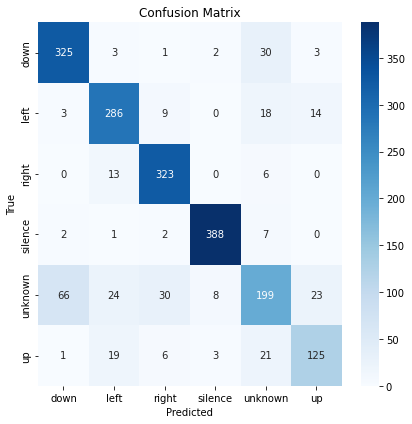

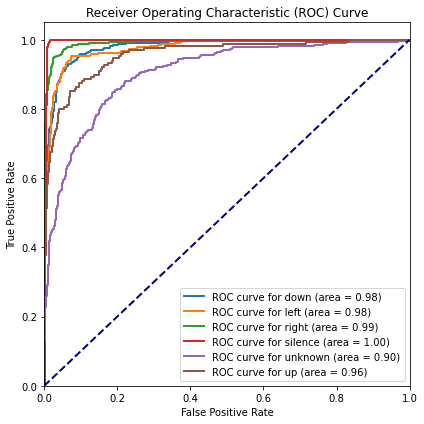

In [71]:
val_loss, val_accuracy, precision, recall, cm, fpr, tpr, roc_auc = validate_and_evaluate(model_CNN, val_loader, criterion, device, label_path, results_path, cnn=True)

In [72]:
val_loss

0.4903037577867508

In [73]:
val_accuracy

83.93676695563488

In [74]:
precision

0.834260285517009

In [75]:
recall

0.8393676695563488